In [1]:
import pandas as pd
import numpy as np
calories = pd.read_csv("E:\\EXCELR\\PARTH SIR\\inclass excercises\\ass\\delivery_time.csv")

### EDA 

In [2]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
calories.rename(columns = {'Delivery Time':'Delivery','Sorting Time':'Sorting'}, inplace = True)

In [4]:
calories.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


In [5]:
import seaborn as sns

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

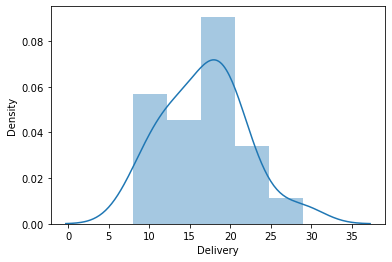

In [6]:
sns.distplot(calories['Delivery'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

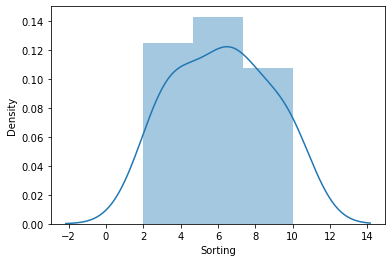

In [7]:
sns.distplot(calories['Sorting'])

### Normal model 

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery~Sorting",data = calories).fit()

<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

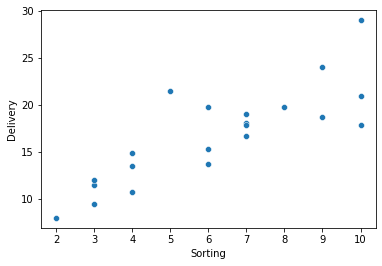

In [9]:
sns.scatterplot(x='Sorting',y='Delivery',data=calories)

In [10]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [11]:
(model.tvalues,model.pvalues)

(Intercept    3.823349
 Sorting      6.387447
 dtype: float64,
 Intercept    0.001147
 Sorting      0.000004
 dtype: float64)

In [12]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Using Log Transformation

In [13]:
#Treating outliers using log Transformstion
x = np.log(calories['Sorting'])
y=calories['Delivery']

In [14]:
data= pd.concat([y,x],axis=1)

In [15]:
data

,Delivery,Sorting
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585
5,15.35,1.791759
6,19.00,1.945910
7,9.50,1.098612
8,17.90,2.302585
9,18.75,2.197225


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

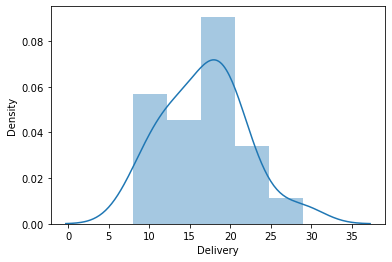

In [16]:
sns.distplot(data['Delivery'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

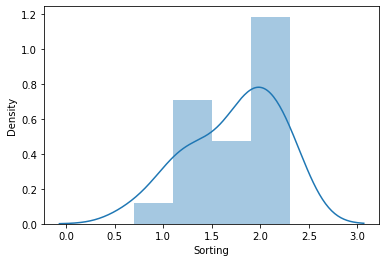

In [17]:
sns.distplot(data['Sorting'])

In [18]:
#Taking model1 For logathmic transformation.
model1 = smf.ols("Delivery~Sorting",data = data).fit()

<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

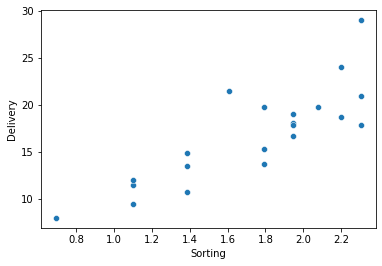

In [19]:
sns.scatterplot(x='Sorting',y='Delivery',data=data)

<AxesSubplot:ylabel='Delivery'>

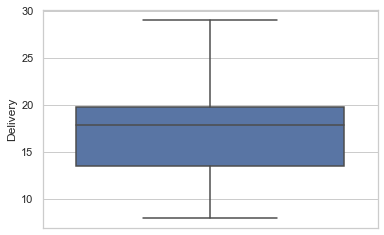

In [20]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=data["Delivery"])

In [21]:
model1.params

Intercept    1.159684
Sorting      9.043413
dtype: float64

In [22]:
print(model1.tvalues,'\n',model.pvalues)

Intercept    0.472460
Sorting      6.586789
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [23]:
(model1.rsquared,model1.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

### Using Square root 

In [24]:
#Treating outliers using log Transformstion
x1 = np.sqrt(calories['Sorting'])
y1 = calories['Delivery']

In [25]:
data1= pd.concat([y1,x1],axis=1)

In [26]:
data1

,Delivery,Sorting
0,21.00,3.162278
1,13.50,2.000000
2,19.75,2.449490
3,24.00,3.000000
4,29.00,3.162278
5,15.35,2.449490
6,19.00,2.645751
7,9.50,1.732051
8,17.90,3.162278
9,18.75,3.000000


In [27]:
data1.corr()

,Delivery,Sorting
Delivery,1.00000,0.83415
Sorting,0.83415,1.00000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

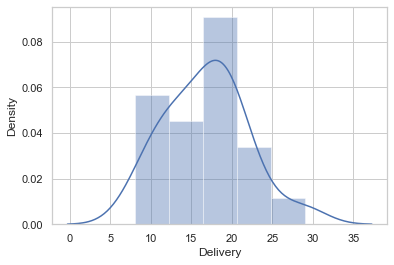

In [28]:
sns.distplot(data1['Delivery'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

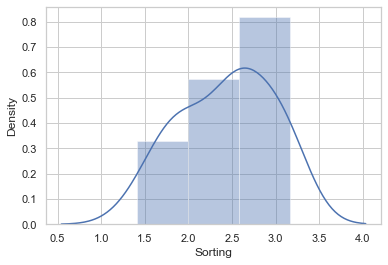

In [29]:
sns.distplot(data1['Sorting'])

In [30]:
model2 = smf.ols("Delivery~Sorting",data = data1).fit()

<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

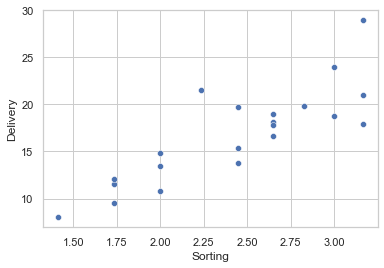

In [31]:
sns.scatterplot(x='Sorting',y='Delivery',data=data1)

<AxesSubplot:ylabel='Delivery'>

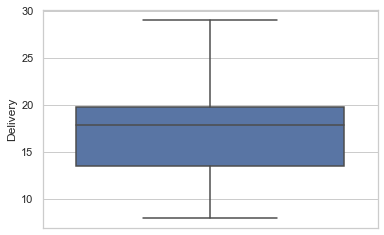

In [32]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=data1["Delivery"])

In [33]:
model2.params

Intercept   -2.518837
Sorting      7.936591
dtype: float64

In [47]:
print(model2.tvalues,'\n',model2.pvalues)
(model2.rsquared,model2.rsquared_adj)

Intercept   -0.840911
Sorting      6.592434
dtype: float64 
 Intercept    0.410857
Sorting      0.000003
dtype: float64


(0.695806227630867, 0.6797960290851232)

### Using BoxCox tranformation 

In [39]:
from scipy.stats import boxcox
x3,_= boxcox(calories['Sorting'])
y3 = calories['Delivery']

In [40]:
x3=pd.Series(x3,dtype=float,name='Sorting')

In [43]:
data2=pd.concat([y3,x3],axis=1)

In [44]:
data2.head()

,Delivery,Sorting
0,21.00,5.719365
1,13.50,2.338756
2,19.75,3.573250
3,24.00,5.211954
4,29.00,5.719365


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

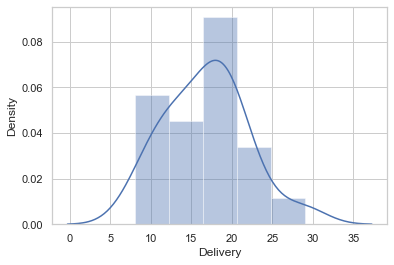

In [45]:
sns.distplot(data2['Delivery'])

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

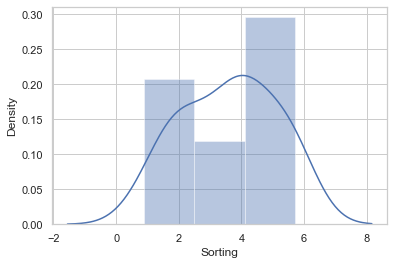

In [46]:
sns.distplot(data2['Sorting'])

In [48]:
model3 = smf.ols("Delivery~Sorting",data = data2).fit()

<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

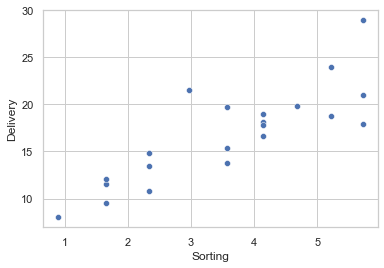

In [49]:
sns.scatterplot(x='Sorting',y='Delivery',data=data2)

<AxesSubplot:ylabel='Delivery'>

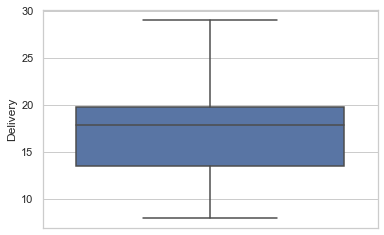

In [50]:
sns.set_theme(style='whitegrid')
sns.boxplot(y=data2["Delivery"])

In [51]:
model3.params

Intercept    6.676804
Sorting      2.817020
dtype: float64

In [52]:
print(model3.tvalues,'\n',model3.pvalues)
(model3.rsquared,model3.rsquared_adj)

Intercept    3.993304
Sorting      6.531646
dtype: float64 
 Intercept    0.000778
Sorting      0.000003
dtype: float64


(0.6918705972941136, 0.6756532603095933)

### Accuracy by Normal model

In [53]:
print(model.params)
print(model.tvalues,'\n',model.pvalues)
(model.rsquared,model.rsquared_adj)

Intercept    6.582734
Sorting      1.649020
dtype: float64
Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


(0.6822714748417231, 0.6655489208860244)

### Accuracy by Log transformation

In [54]:
print(model1.params)
print(model1.tvalues,'\n',model1.pvalues)
(model1.rsquared,model1.rsquared_adj)

Intercept    1.159684
Sorting      9.043413
dtype: float64
Intercept    0.472460
Sorting      6.586789
dtype: float64 
 Intercept    0.641980
Sorting      0.000003
dtype: float64


(0.6954434611324223, 0.6794141696130761)

### Accuracy by Square root transformation

In [55]:
print(model2.params)
print(model2.tvalues,'\n',model2.pvalues)
(model2.rsquared,model2.rsquared_adj)

Intercept   -2.518837
Sorting      7.936591
dtype: float64
Intercept   -0.840911
Sorting      6.592434
dtype: float64 
 Intercept    0.410857
Sorting      0.000003
dtype: float64


(0.695806227630867, 0.6797960290851232)

### Accuracy by BoxCox transformation

In [58]:
print(model3.params)
print(model3.tvalues,'\n',model3.pvalues)
(model3.rsquared,model3.rsquared_adj)

Intercept    6.676804
Sorting      2.817020
dtype: float64
Intercept    3.993304
Sorting      6.531646
dtype: float64 
 Intercept    0.000778
Sorting      0.000003
dtype: float64


(0.6918705972941136, 0.6756532603095933)